<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

In [2]:
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
urllib.request.urlretrieve(url, "survey-data.csv")

print("Download complete!")


Download complete!


**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [3]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [4]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [7]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [8]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [16]:
## Write your code here
#Step 1: Inspect the data range

import plotly.express as px

# Query CompTotal from database
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df_comp = pd.read_sql_query(QUERY, conn)

# Plot interactive histogram
fig = px.histogram(
    df_comp,
    x="CompTotal",
    nbins=30, 
    title="Distribution of Total Compensation (CompTotal)"
)
fig.update_layout(
    xaxis_title="Compensation",
    yaxis_title="Number of Respondents",
    bargap=0.1
)
fig.show()

print("Min:", df_comp['CompTotal'].min())
print("Max:", df_comp['CompTotal'].max())
print("Median:", df_comp['CompTotal'].median())
print("90th Percentile:", df_comp['CompTotal'].quantile(0.9))

Min: 0.0
Max: 1.0000000000000002e+150
Median: 110000.0
90th Percentile: 1200000.0


In [17]:

# Keep only reasonable values
# Step 2: Filter out extreme outliers
#For salaries/compensation, it’s common to cap the range to something reasonable (e.g., < 500,000 USD).
df_comp_filtered = df_comp[df_comp['CompTotal'] < 500000]

# Plot again
import plotly.express as px
fig = px.histogram(
    df_comp_filtered,
    x="CompTotal",
    nbins=50,
    title="Distribution of Total Compensation (Filtered < 500k)"
)
fig.update_layout(
    xaxis_title="Compensation",
    yaxis_title="Number of Respondents"
)
fig.show()

**Box Plots**

Plot a box plot of Age.


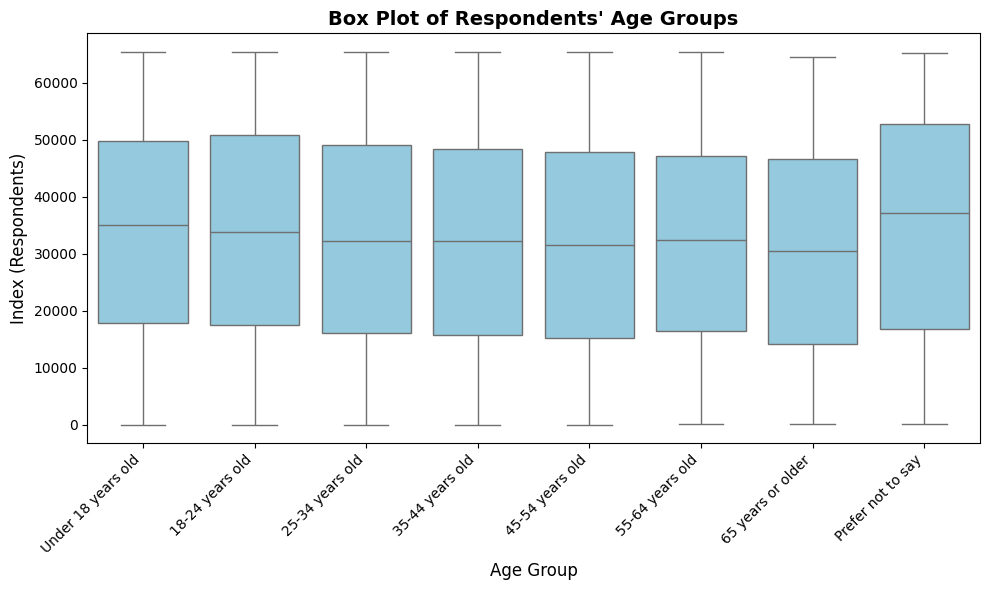

In [18]:
## Write your code here
# Option 1
import seaborn as sns
import matplotlib.pyplot as plt

# Query Age from database
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""
df_age = pd.read_sql_query(QUERY, conn)

# Define an ordered category for Age
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

df_age['Age'] = pd.Categorical(df_age['Age'], categories=age_order, ordered=True)

# Plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x="Age", y=df_age.index, data=df_age, order=age_order, color="skyblue")

plt.title("Box Plot of Respondents' Age Groups", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Index (Respondents)", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

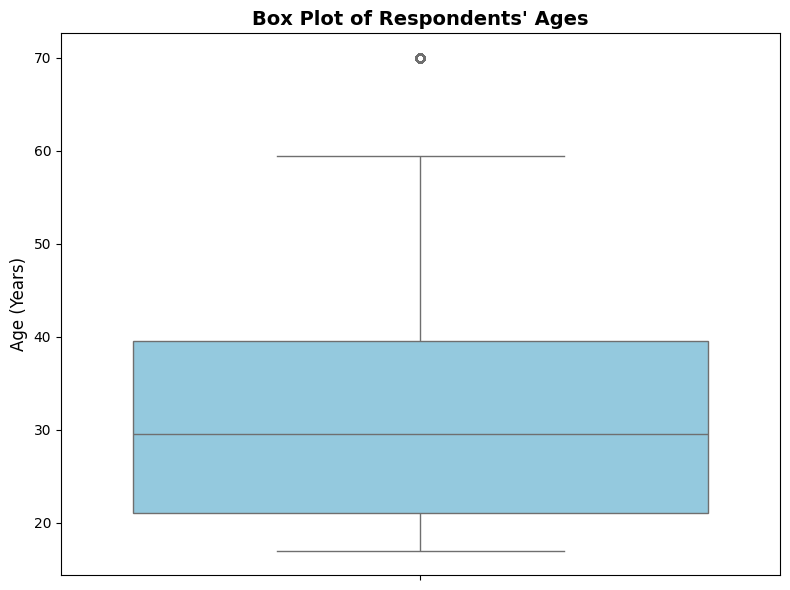

In [19]:
#Option 2
# 
QUERY = """
SELECT 
  CASE 
    WHEN Age = 'Under 18 years old' THEN 17
    WHEN Age = '18-24 years old' THEN 21
    WHEN Age = '25-34 years old' THEN 29.5
    WHEN Age = '35-44 years old' THEN 39.5
    WHEN Age = '45-54 years old' THEN 49.5
    WHEN Age = '55-64 years old' THEN 59.5
    WHEN Age = '65 years or older' THEN 70
    ELSE NULL
  END AS AgeNumeric
FROM main
WHERE Age IS NOT NULL
"""
df_age = pd.read_sql_query(QUERY, conn)

# Boxplot using seaborn
plt.figure(figsize=(8,6))
sns.boxplot(y="AgeNumeric", data=df_age, color="skyblue")

plt.title("Box Plot of Respondents' Ages", fontsize=14, fontweight="bold")
plt.ylabel("Age (Years)", fontsize=12)
plt.xlabel("")
plt.tight_layout()
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


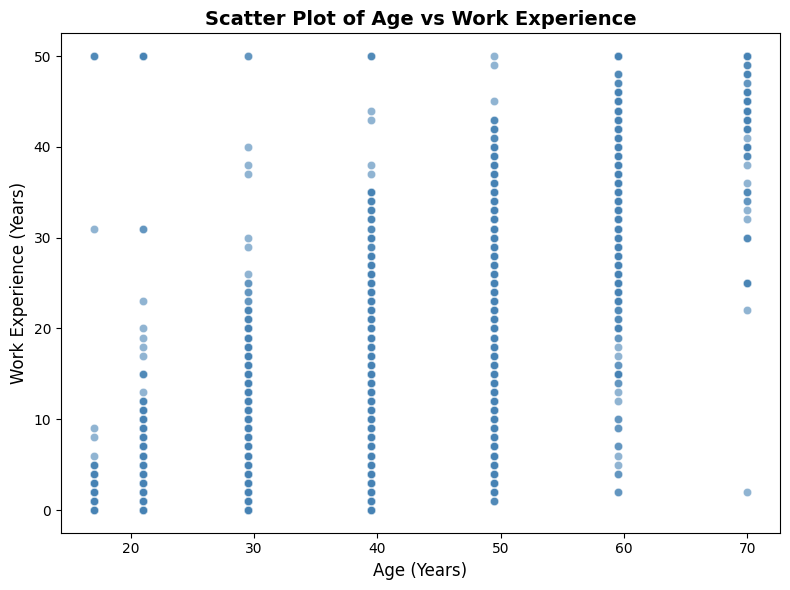

In [20]:
## Write your code here
# Option 1

import matplotlib.pyplot as plt
import seaborn as sns

# SQL query: convert Age into numeric values and select WorkExp
QUERY = """
SELECT 
  CASE 
    WHEN Age = 'Under 18 years old' THEN 17
    WHEN Age = '18-24 years old' THEN 21
    WHEN Age = '25-34 years old' THEN 29.5
    WHEN Age = '35-44 years old' THEN 39.5
    WHEN Age = '45-54 years old' THEN 49.5
    WHEN Age = '55-64 years old' THEN 59.5
    WHEN Age = '65 years or older' THEN 70
    ELSE NULL
  END AS AgeNumeric,
  WorkExp
FROM main
WHERE Age IS NOT NULL AND WorkExp IS NOT NULL
"""
df_scatter = pd.read_sql_query(QUERY, conn)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="AgeNumeric", y="WorkExp", data=df_scatter, alpha=0.6, color="steelblue")

plt.title("Scatter Plot of Age vs Work Experience", fontsize=14, fontweight="bold")
plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Work Experience (Years)", fontsize=12)

plt.tight_layout()
plt.show()


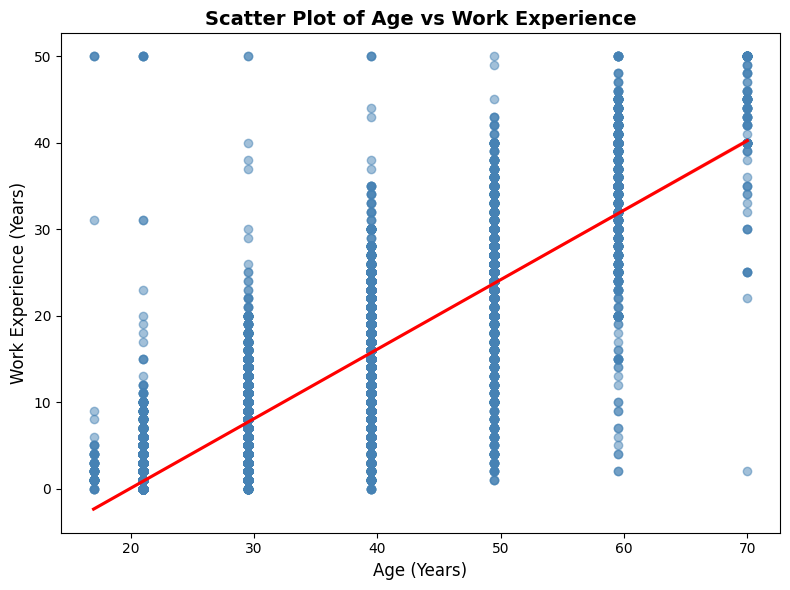

In [21]:
# Option 2: With regression line
# %%
import matplotlib.pyplot as plt
import seaborn as sns

# SQL query: map Age to numeric midpoints and select WorkExp
QUERY = """
SELECT 
  CASE 
    WHEN Age = 'Under 18 years old' THEN 17
    WHEN Age = '18-24 years old' THEN 21
    WHEN Age = '25-34 years old' THEN 29.5
    WHEN Age = '35-44 years old' THEN 39.5
    WHEN Age = '45-54 years old' THEN 49.5
    WHEN Age = '55-64 years old' THEN 59.5
    WHEN Age = '65 years or older' THEN 70
    ELSE NULL
  END AS AgeNumeric,
  WorkExp
FROM main
WHERE Age IS NOT NULL AND WorkExp IS NOT NULL
"""
df_scatter = pd.read_sql_query(QUERY, conn)

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(
    x="AgeNumeric",
    y="WorkExp",
    data=df_scatter,
    scatter_kws={"alpha":0.5, "color":"steelblue"},
    line_kws={"color":"red"}
)

plt.title("Scatter Plot of Age vs Work Experience", fontsize=14, fontweight="bold")
plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Work Experience (Years)", fontsize=12)

plt.tight_layout()
plt.show()

Output discussion.
Dots (blue points): Each respondent → their age (x-axis) vs work experience (y-axis).
Red line: Regression line (best fit). It shows the general trend in the data.

Expected pattern:
At younger ages (18–25), work experience is low (close to 0–5 years).
As age increases, work experience tends to increase too.
The line may flatten out at older ages if some respondents reported fewer years of formal experience despite being older (e.g., career changers, students, retirees).
So overall, you should see a positive correlation (older respondents generally have more work experience), but not a perfect one — there will be scatter/outliers.

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


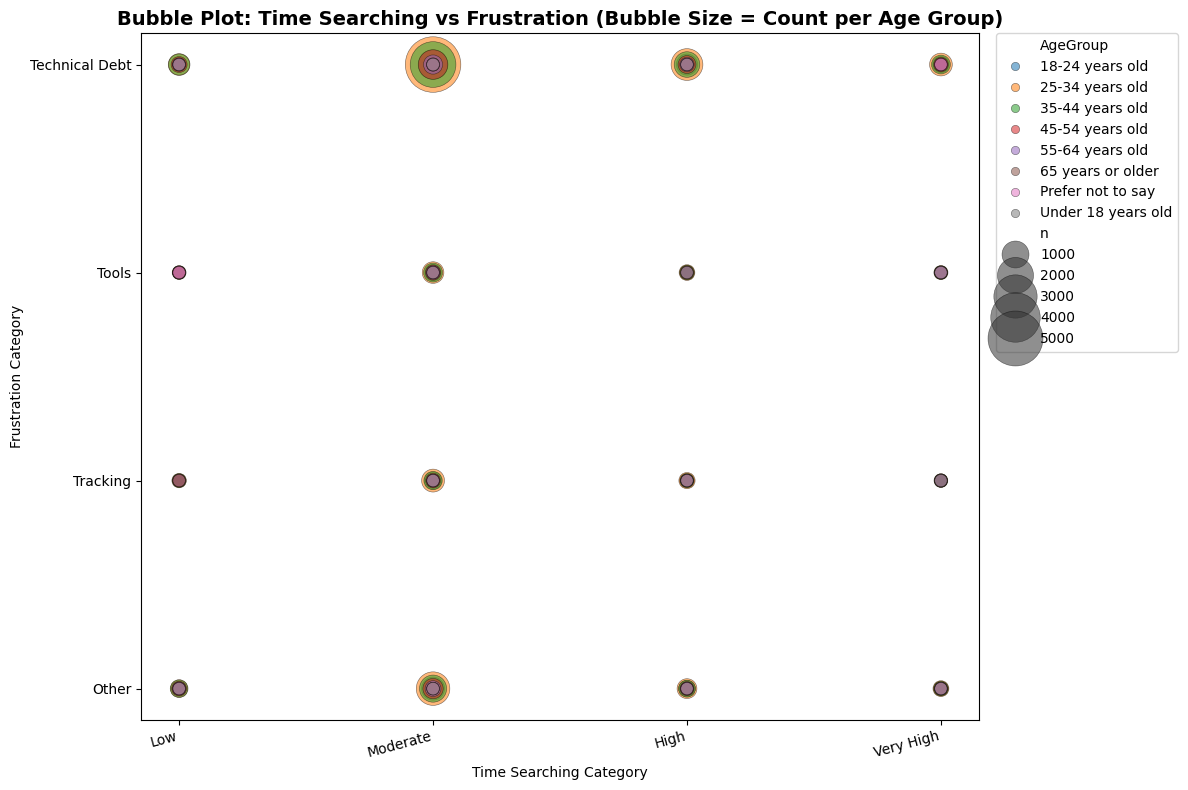

In [22]:
## Write your code here
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

QUERY = """
WITH cleaned AS (
  SELECT
    CASE
      WHEN TimeSearching = 'Less than 15 minutes a day' THEN 'Low'
      WHEN TimeSearching IN ('15-30 minutes a day','30-60 minutes a day') THEN 'Moderate'
      WHEN TimeSearching = '60-120 minutes a day' THEN 'High'
      WHEN TimeSearching = 'Over 120 minutes a day' THEN 'Very High'
      ELSE 'Other'
    END AS TimeSearchingCategory,

    CASE
      WHEN Frustration LIKE '%technical debt%' THEN 'Technical Debt'
      WHEN Frustration LIKE '%software tools%' THEN 'Tools'
      WHEN Frustration LIKE '%tracking%' THEN 'Tracking'
      ELSE 'Other'
    END AS FrustrationCategory,

    Age AS AgeGroup
  FROM main
  WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND Frustration IS NOT NULL
)
SELECT
  TimeSearchingCategory,
  FrustrationCategory,
  AgeGroup,
  COUNT(*) AS n
FROM cleaned
GROUP BY TimeSearchingCategory, FrustrationCategory, AgeGroup;
"""
df_bubble = pd.read_sql_query(QUERY, conn)

# Keep your desired age order
age_order = ['18-24 years old','25-34 years old','35-44 years old','45-54 years old',
             '55-64 years old','65 years or older','Prefer not to say','Under 18 years old']
time_order  = ['Low','Moderate','High','Very High','Other']
frust_order = ['Technical Debt','Tools','Tracking','Other']

df_bubble['AgeGroup']              = pd.Categorical(df_bubble['AgeGroup'],              categories=age_order, ordered=True)
df_bubble['TimeSearchingCategory'] = pd.Categorical(df_bubble['TimeSearchingCategory'], categories=time_order, ordered=True)
df_bubble['FrustrationCategory']   = pd.Categorical(df_bubble['FrustrationCategory'],   categories=frust_order, ordered=True)

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df_bubble,
    x="TimeSearchingCategory",
    y="FrustrationCategory",
    size="n",                    # bubble area = number of respondents
    hue="AgeGroup",              # color by age bucket
    sizes=(80, 1600),
    alpha=0.55,
    edgecolor="black",
    linewidth=0.4,
    legend="brief"
)
plt.title("Bubble Plot: Time Searching vs Frustration (Bubble Size = Count per Age Group)", fontsize=14, fontweight="bold")
plt.xlabel("Time Searching Category"); plt.ylabel("Frustration Category")
plt.xticks(rotation=15, ha='right')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


Creating pie chart of top 5 databases...


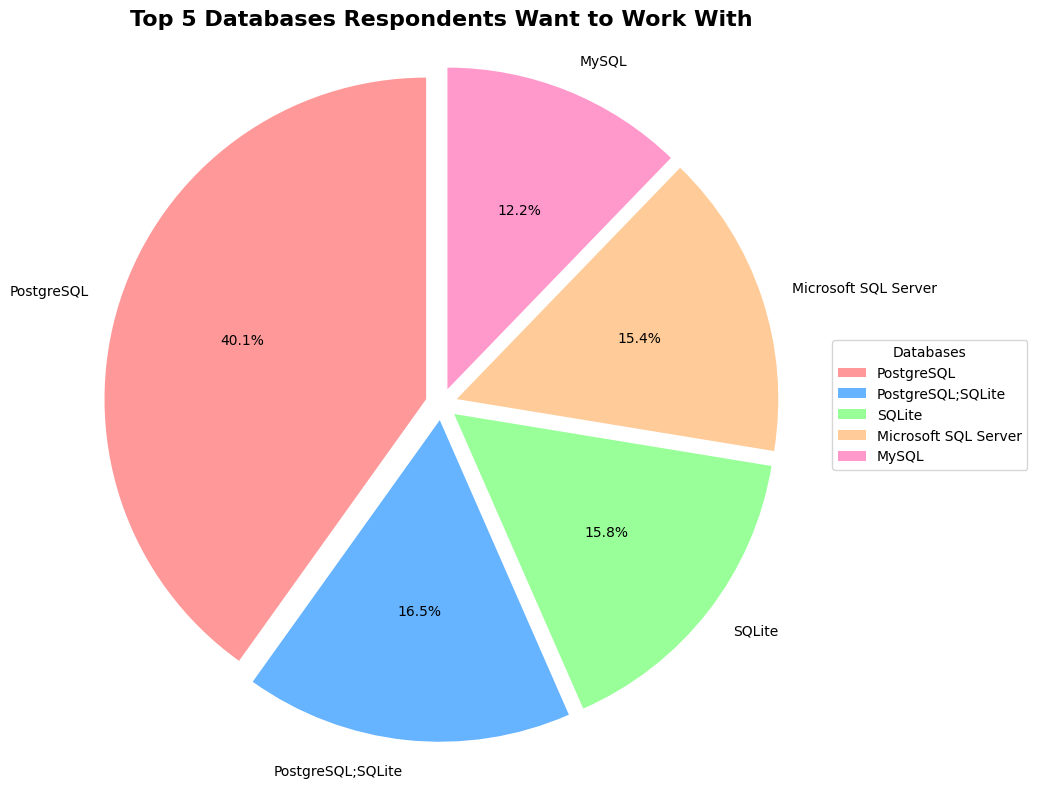

Pie chart saved as 'database_pie_chart.png'


In [23]:
## Write your code here(answer from blaxbox)

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

def create_database_pie_chart():
    """Create a pie chart of top 5 databases that respondents wish to learn"""
    print("Creating pie chart of top 5 databases...")
    
    # Connect to the SQLite database
    conn = sqlite3.connect('survey-data.sqlite')
    
    # Query to get database preferences
    QUERY = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
    df = pd.read_sql_query(QUERY, conn)
    
    plt.figure(figsize=(10, 8))
    
    if not df.empty and 'DatabaseWantToWorkWith' in df.columns:
        # Count database preferences and get top 5
        db_counts = df['DatabaseWantToWorkWith'].value_counts().head(5)
        
        # Define colors for the pie chart
        colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
        
        # Create pie chart
        plt.pie(db_counts.values, labels=db_counts.index, autopct='%1.1f%%', 
               colors=colors, startangle=90, explode=[0.05]*len(db_counts))
        plt.title('Top 5 Databases Respondents Want to Work With', fontsize=16, fontweight='bold')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        
        # Add a legend
        plt.legend(db_counts.index, title="Databases", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        
    else:
        plt.text(0.5, 0.5, 'DatabaseWantToWorkWith column not found or no data available', 
                ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
        plt.title('Database Preferences Pie Chart (No Data)', fontsize=16)
    
    # Close database connection
    conn.close()
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig('database_pie_chart.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Pie chart saved as 'database_pie_chart.png'")

if __name__ == "__main__":
    create_database_pie_chart()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


Median TimeSearching (30–35): 45.0 min
Median TimeAnswering (30–35): 22.5 min


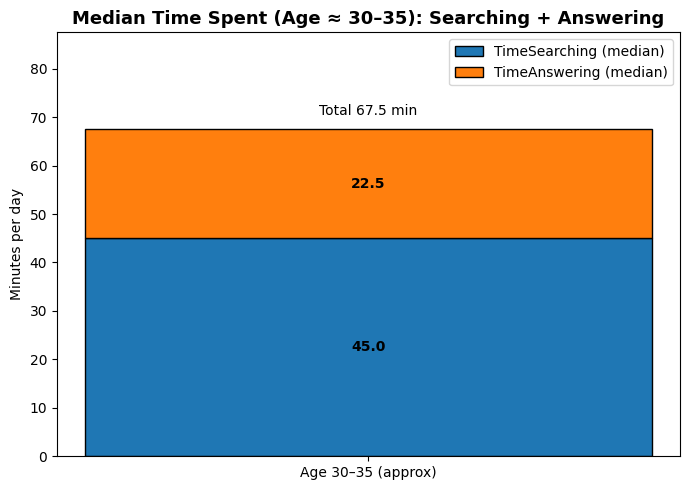

In [24]:
## Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Get a 30–35 approximation + map text buckets to minutes in SQL ---
QUERY = """
SELECT
  -- map TimeSearching to minutes
  CASE
    WHEN TimeSearching = 'Less than 15 minutes a day' THEN 10
    WHEN TimeSearching = '15-30 minutes a day'        THEN 22.5
    WHEN TimeSearching = '30-60 minutes a day'        THEN 45
    WHEN TimeSearching = '60-120 minutes a day'       THEN 90
    WHEN TimeSearching = 'Over 120 minutes a day'     THEN 150
    ELSE NULL
  END AS TimeSearchingMin,

  -- map TimeAnswering to minutes (adjust names if your column differs)
  CASE
    WHEN TimeAnswering = 'Less than 15 minutes a day' THEN 10
    WHEN TimeAnswering = '15-30 minutes a day'        THEN 22.5
    WHEN TimeAnswering = '30-60 minutes a day'        THEN 45
    WHEN TimeAnswering = '60-120 minutes a day'       THEN 90
    WHEN TimeAnswering = 'Over 120 minutes a day'     THEN 150
    ELSE NULL
  END AS TimeAnsweringMin

FROM main
WHERE Age IN ('25-34 years old','35-44 years old')
  AND TimeSearching IS NOT NULL
  AND TimeAnswering IS NOT NULL
"""
df_3035 = pd.read_sql_query(QUERY, conn)

# --- 2) Compute medians in minutes ---
med_search = float(df_3035['TimeSearchingMin'].median())
med_answer = float(df_3035['TimeAnsweringMin'].median())

print(f"Median TimeSearching (30–35): {med_search} min")
print(f"Median TimeAnswering (30–35): {med_answer} min")

# --- 3) Stacked bar chart (one bar with two segments) ---
label = ['Age 30–35 (approx)']
bottom = [med_search]

plt.figure(figsize=(7,5))
plt.bar(label, [med_search], label='TimeSearching (median)', edgecolor='black')
plt.bar(label, [med_answer], bottom=bottom, label='TimeAnswering (median)', edgecolor='black')

# annotate segment values
plt.text(0, med_search/2, f"{med_search:.1f}", ha='center', va='center', fontsize=10, fontweight='bold')
plt.text(0, med_search + med_answer/2, f"{med_answer:.1f}", ha='center', va='center', fontsize=10, fontweight='bold')

# annotate total on top
plt.text(0, med_search + med_answer + 3, f"Total {med_search + med_answer:.1f} min", ha='center', fontsize=10)

plt.title("Median Time Spent (Age ≈ 30–35): Searching + Answering", fontsize=13, fontweight='bold')
plt.ylabel("Minutes per day")
plt.ylim(0, med_search + med_answer + 20)
plt.legend()
plt.tight_layout()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


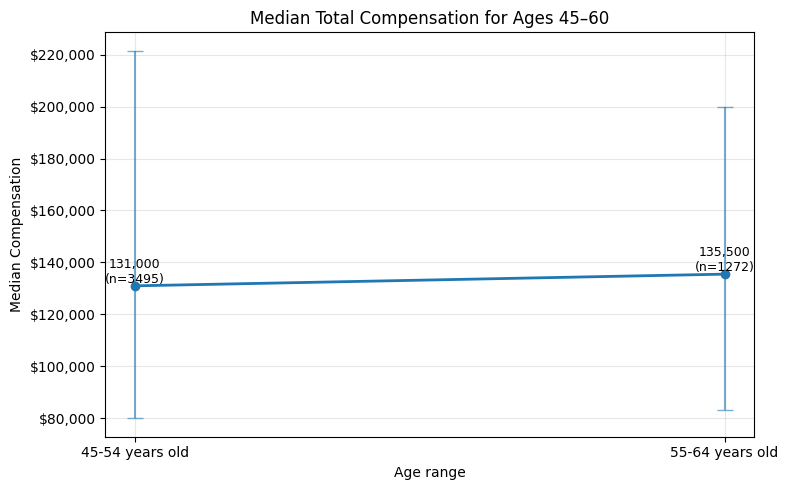

In [25]:
## Write your code here
# %%
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# 1) Pull data (cast to numeric) for the two age ranges that cover 45–60
QUERY = """
SELECT Age, CAST(CompTotal AS REAL) AS CompTotal
FROM main
WHERE Age IN ('45-54 years old','55-64 years old') AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df = df[pd.to_numeric(df["CompTotal"], errors="coerce") > 0]

# 2) Aggregate: median, IQR, and n
order = ['45-54 years old','55-64 years old']
agg = (df.groupby('Age')['CompTotal']
         .agg(Median='median',
              Q1=lambda s: s.quantile(0.25),
              Q3=lambda s: s.quantile(0.75),
              n='count')
         .reindex(order))

# 3) Plot: line + IQR error bars + labels
x = range(len(agg))
y = agg['Median'].values
err_low  = y - agg['Q1'].values
err_high = agg['Q3'].values - y

plt.figure(figsize=(8,5))
plt.plot(x, y, marker='o', linewidth=2)
plt.errorbar(x, y, yerr=[err_low, err_high], fmt='none', capsize=6, alpha=0.6)

plt.xticks(x, agg.index)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.title('Median Total Compensation for Ages 45–60')
plt.xlabel('Age range')
plt.ylabel('Median Compensation')
plt.grid(True, alpha=0.3)

# annotate median and n
for i, (median, n) in enumerate(zip(y, agg['n'])):
    plt.text(i, median, f'{median:,.0f}\n(n={n})',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

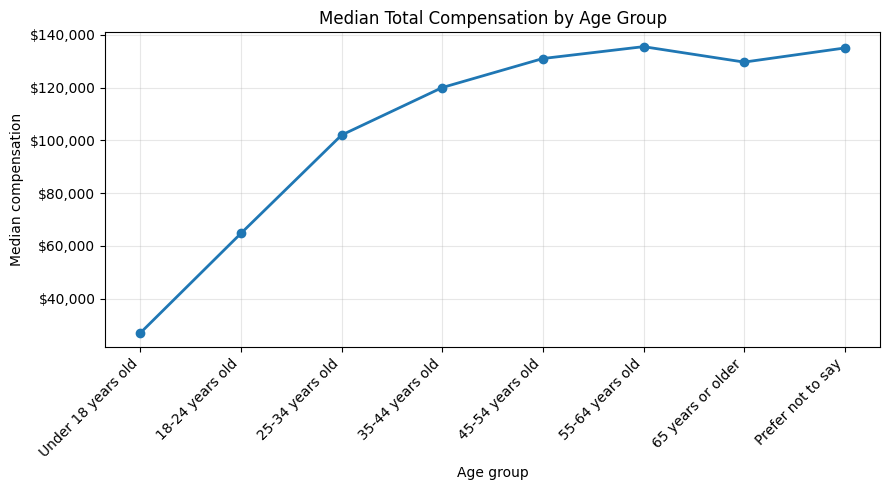

In [26]:
# option 2 for all ages
# %%
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# 1) Pull Age + CompTotal (cast to numeric) from SQLite
QUERY = """
SELECT
  Age,
  CAST(CompTotal AS REAL) AS CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Keep valid/positive values
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df[df["CompTotal"] > 0]

# 2) Median compensation by Age (order ages logically)
age_order = [
    'Under 18 years old','18-24 years old','25-34 years old',
    '35-44 years old','45-54 years old','55-64 years old',
    '65 years or older','Prefer not to say'
]
med = (df.groupby("Age")["CompTotal"]
         .median()
         .reindex(age_order)
         .dropna())

# 3) Line chart
x = range(len(med))
plt.figure(figsize=(9,5))
plt.plot(x, med.values, marker='o', linewidth=2)

plt.xticks(x, med.index, rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.title('Median Total Compensation by Age Group')
plt.xlabel('Age group'); plt.ylabel('Median compensation')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


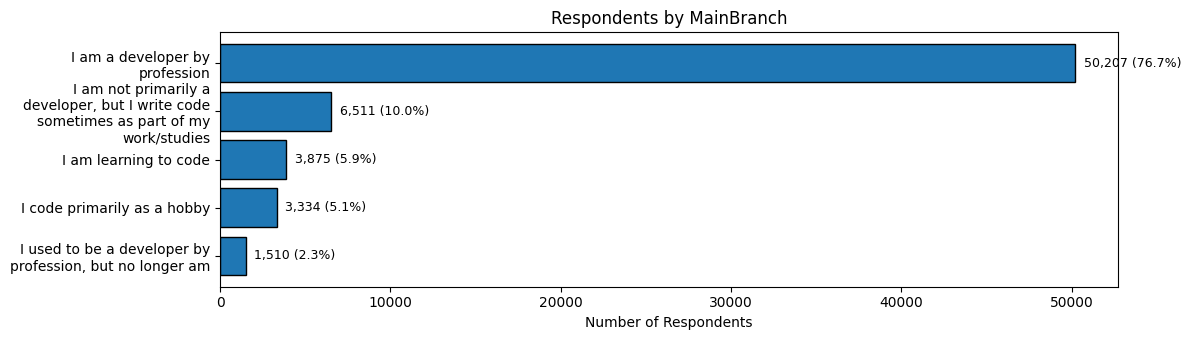

In [27]:
## Write your code here
# %%
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# 1) Aggregate counts by MainBranch in SQL
QUERY = """
SELECT
  TRIM(MainBranch) AS branch,
  COUNT(*)         AS n
FROM main
WHERE MainBranch IS NOT NULL AND TRIM(MainBranch) <> ''
GROUP BY TRIM(MainBranch)
ORDER BY n DESC
"""
df_branch = pd.read_sql_query(QUERY, conn)

# 2) (Optional) show only top N categories
top_n = None   # set to an integer like 10 to show top 10; keep None for all
df_plot = df_branch.head(top_n) if top_n else df_branch.copy()

# 3) Wrap long labels BEFORE plotting
wrap_width = 28
df_plot["branch_wrapped"] = df_plot["branch"].apply(
    lambda s: "\n".join(textwrap.wrap(s, width=wrap_width))
)

# 4) Percentages for annotations (relative to ALL rows, not just top N)
total = int(df_branch["n"].sum())
df_plot["pct"] = (df_plot["n"] / total * 100).round(1)

# 5) Plot horizontal bar chart
plt.figure(figsize=(12, 0.5 * len(df_plot) + 1))
bars = plt.barh(df_plot["branch_wrapped"], df_plot["n"], edgecolor="black")

plt.xlabel("Number of Respondents")
plt.title("Respondents by MainBranch")
plt.gca().invert_yaxis()  # largest at top

# 6) Annotate counts and percentages
x_offset = max(df_plot["n"]) * 0.01
for rect, n, p in zip(bars, df_plot["n"], df_plot["pct"]):
    y = rect.get_y() + rect.get_height() / 2
    plt.text(rect.get_width() + x_offset, y, f"{n:,} ({p}%)",
             va="center", fontsize=9)

plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [28]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
